In [3]:
# dependencies
import random
import pandas as pd
import requests
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import json

In [4]:
filename = "AllSampleWYears_lat&lng.csv"
df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
df.head(2)

,Duration,Start date,End date,Start station #,Start station,Start Station Lat,Start Station Lng,End station #,End station,LATITUDE,LONGITUDE,Bike number,Member type,REMOVAL_DATE,NUMBER_OF_BIKES
0,1012,2010-09-20 11:27:00,2010-09-20 11:43:00,31208,M St & New Jersey Ave SE,38.876300,-77.003700,31108,4th & M St SW,38.8767,-77.0178,W00742,Member,NaN,5.0
1,1487,2010-09-20 12:19:00,2010-09-20 12:44:00,31703,Minnesota Ave Metro/DOES,38.897063,-76.947446,31603,1st & M St NE,38.9057,-77.0056,W00803,Member,NaN,6.0


In [5]:
df.columns

Index(['Duration', 'Start date', 'End date', 'Start station #',
       'Start station', 'Start Station Lat', 'Start Station Lng',
       'End station #', 'End station', 'LATITUDE', 'LONGITUDE', 'Bike number',
       'Member type', 'REMOVAL_DATE', 'NUMBER_OF_BIKES'],
      dtype='object')

In [6]:
df = df.rename(columns={'Duration': 'Duration', 
                        'Start date': 'Start date', 
                        'End date': 'End date', 
                        'Start station #': 'Start station number',
                        'Start station': 'Start station', 
                        'Start Station Lat': 'Start station lat', 
                        'Start Station Lng': 'Start station lng',
                        'End station #': 'End station number', 
                        'End station': 'End station', 
                        'LATITUDE': 'End station lat', 
                        'LONGITUDE': 'End station lng', 
                        'Bike number': 'Bike number', 
                        'NUMBER_OF_BIKES': 'number of bikes',
                        'Member type': 'Member type'
                       })
df.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'Start station lat', 'Start station lng',
       'End station number', 'End station', 'End station lat',
       'End station lng', 'Bike number', 'Member type', 'REMOVAL_DATE',
       'number of bikes'],
      dtype='object')

In [7]:
df = df[['Duration', 'Start date', 'End date', 'Start station number','Start station', 'Start station lat', 
         'Start station lng', 'End station number', 'End station', 'End station lat', 'End station lng', 
         'Bike number', 'number of bikes','Member type']]
df.head(2)

,Duration,Start date,End date,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type
0,1012,2010-09-20 11:27:00,2010-09-20 11:43:00,31208,M St & New Jersey Ave SE,38.876300,-77.003700,31108,4th & M St SW,38.8767,-77.0178,W00742,5.0,Member
1,1487,2010-09-20 12:19:00,2010-09-20 12:44:00,31703,Minnesota Ave Metro/DOES,38.897063,-76.947446,31603,1st & M St NE,38.9057,-77.0056,W00803,6.0,Member


In [8]:
df['Year'] = df["End date"].str[:4]
df['Month'] = df['End date'].str[5:7]
df['Date'] = df["End date"].str[:10]
df['Time_Hr'] = df["End date"].str[11:13]
df

,Duration,Start date,End date,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type,Year,Month,Date,Time_Hr
0,1012,2010-09-20 11:27:00,2010-09-20 11:43:00,31208,M St & New Jersey Ave SE,38.876300,-77.003700,31108,4th & M St SW,38.876700,-77.017800,W00742,5.0,Member,2010,09,2010-09-20,11
1,1487,2010-09-20 12:19:00,2010-09-20 12:44:00,31703,Minnesota Ave Metro/DOES,38.897063,-76.947446,31603,1st & M St NE,38.905700,-77.005600,W00803,6.0,Member,2010,09,2010-09-20,12
2,387,2010-09-20 13:20:00,2010-09-20 13:27:00,31009,27th & Crystal Dr,38.848466,-77.051514,31009,27th & Crystal Dr,38.848466,-77.051514,W00821,8.0,Member,2010,09,2010-09-20,13
3,1409,2010-09-20 13:22:00,2010-09-20 13:46:00,31600,5th & K St NW,38.903040,-77.019027,31100,19th St & Pennsylvania Ave NW,38.900300,-77.042900,W00833,2.0,Member,2010,09,2010-09-20,13
4,1238,2010-09-20 13:28:00,2010-09-20 13:48:00,31002,20th & Crystal Dr,38.856425,-77.049232,31012,26th & S Clark St,38.850688,-77.051520,W01034,4.0,Member,2010,09,2010-09-20,13
5,433,2010-09-20 13:55:00,2010-09-20 14:02:00,31011,23rd & Crystal Dr,38.853300,-77.049800,31011,23rd & Crystal Dr,38.853300,-77.049800,W00764,11.0,Member,2010,09,2010-09-20,14
6,3044,2010-09-20 14:28:00,2010-09-20 15:19:00,31100,19th St & Pennsylvania Ave NW,38.900300,-77.042900,31200,Massachusetts Ave & Dupont Circle NW,38.910100,-77.044400,W00993,13.0,Casual,2010,09,2010-09-20,15
7,956,2010-09-20 15:01:00,2010-09-20 15:17:00,31101,14th & V St NW,38.917600,-77.032100,31204,20th & E St NW,38.896300,-77.045000,W01058,0.0,Member,2010,09,2010-09-20,15
8,7275,2010-09-20 15:57:00,2010-09-20 17:58:00,31100,19th St & Pennsylvania Ave NW,38.900300,-77.042900,31103,16th & Harvard St NW,38.926088,-77.036536,W00976,1.0,Member,2010,09,2010-09-20,17
9,407,2010-09-20 16:22:00,2010-09-20 16:29:00,31111,10th & U St NW,38.917200,-77.025900,31201,15th & P St NW,38.909850,-77.034438,W00642,13.0,Member,2010,09,2010-09-20,16


In [9]:
df.columns
df = df[['Duration', 'Start date', 'End date', 'Year', 'Month', 'Date', 'Time_Hr','Start station number','Start station', 'Start station lat', 
         'Start station lng', 'End station number', 'End station', 'End station lat', 'End station lng', 
         'Bike number', 'number of bikes','Member type']]
df.head(2)

,Duration,Start date,End date,Year,Month,Date,Time_Hr,Start station number,Start station,Start station lat,Start station lng,End station number,End station,End station lat,End station lng,Bike number,number of bikes,Member type
0,1012,2010-09-20 11:27:00,2010-09-20 11:43:00,2010,09,2010-09-20,11,31208,M St & New Jersey Ave SE,38.876300,-77.003700,31108,4th & M St SW,38.8767,-77.0178,W00742,5.0,Member
1,1487,2010-09-20 12:19:00,2010-09-20 12:44:00,2010,09,2010-09-20,12,31703,Minnesota Ave Metro/DOES,38.897063,-76.947446,31603,1st & M St NE,38.9057,-77.0056,W00803,6.0,Member


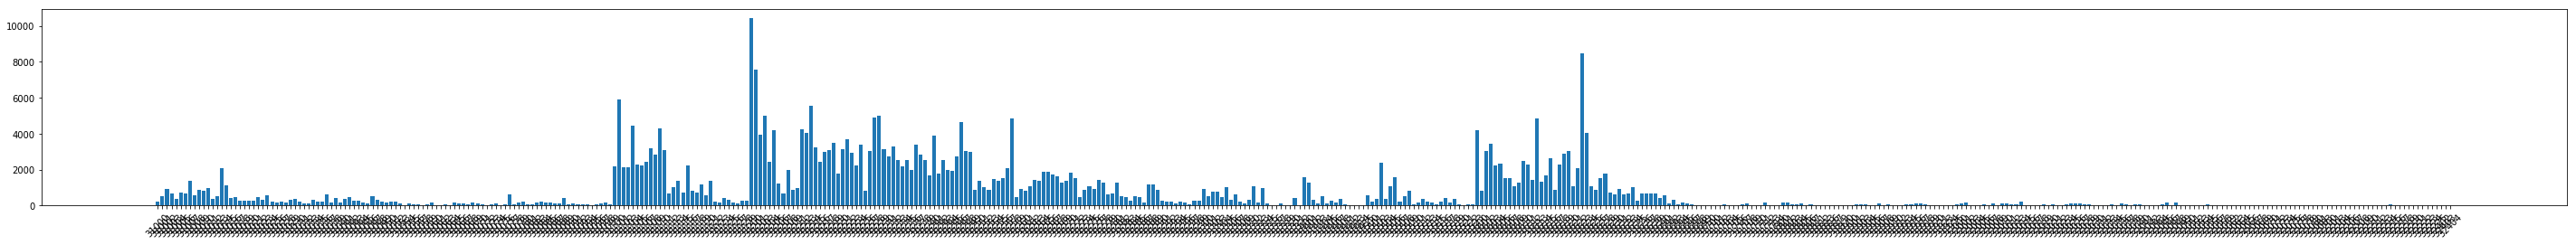

In [10]:
stations_lat_lng = df.groupby('End station number')['Duration'].count()
# print(pd.DataFrame(stations_lat_lng))
# ('End station')

plt.figure(figsize=(50,4))
plt.bar(range(len(stations_lat_lng)),stations_lat_lng)
plt.xticks(range(len(stations_lat_lng)), stations_lat_lng.index, rotation=45)
plt.show()

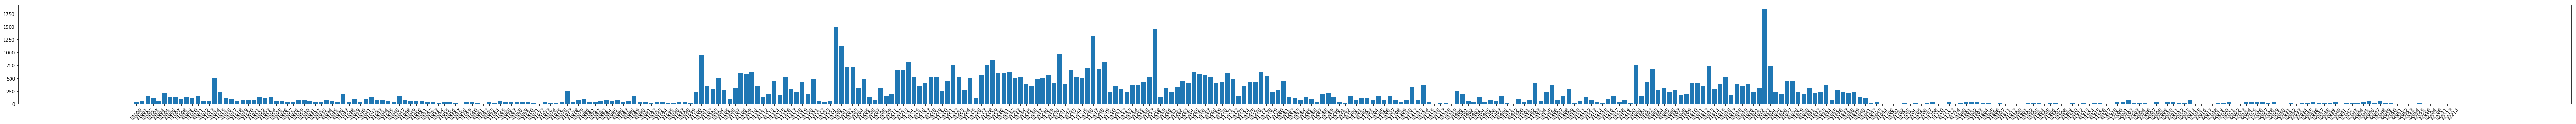

In [9]:
# stations_lat_lng = df.groupby('End station number')['Member type'].count()
# # print(pd.DataFrame(stations_lat_lng))
# # ('End station')

# plt.figure(figsize=(100,4))
# plt.bar(range(len(stations_lat_lng)),stations_lat_lng)
# plt.xticks(range(len(stations_lat_lng)), stations_lat_lng.index, rotation=45)
# plt.show()

In [11]:
df.columns

Index(['Duration', 'Start date', 'End date', 'Year', 'Month', 'Date',
       'Time_Hr', 'Start station number', 'Start station', 'Start station lat',
       'Start station lng', 'End station number', 'End station',
       'End station lat', 'End station lng', 'Bike number', 'number of bikes',
       'Member type'],
      dtype='object')

       Date  percent change
Year                       
2010  39999        49.99875
2011  40000        50.00000
2012  40001        50.00125
2013  40000        50.00000
2014  40000        50.00000
2015  40000        50.00000
2016  80000       100.00000
2017  40000        50.00000
2018  29997        37.49625


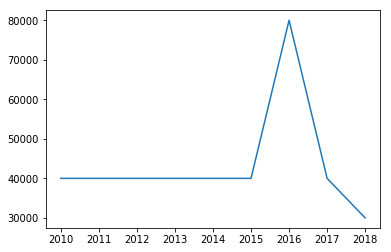

In [13]:
# change over the years
change_over_years=df.groupby('Year')['Date'].count()
change_over_years=pd.DataFrame(change_over_years)
change_over_years['percent change']=change_over_years['Date']/max(change_over_years['Date'].values)*100
print(change_over_years)
plt.plot(change_over_years.index, change_over_years['Date'])
# plt.xlim(2010,2018)
plt.show()

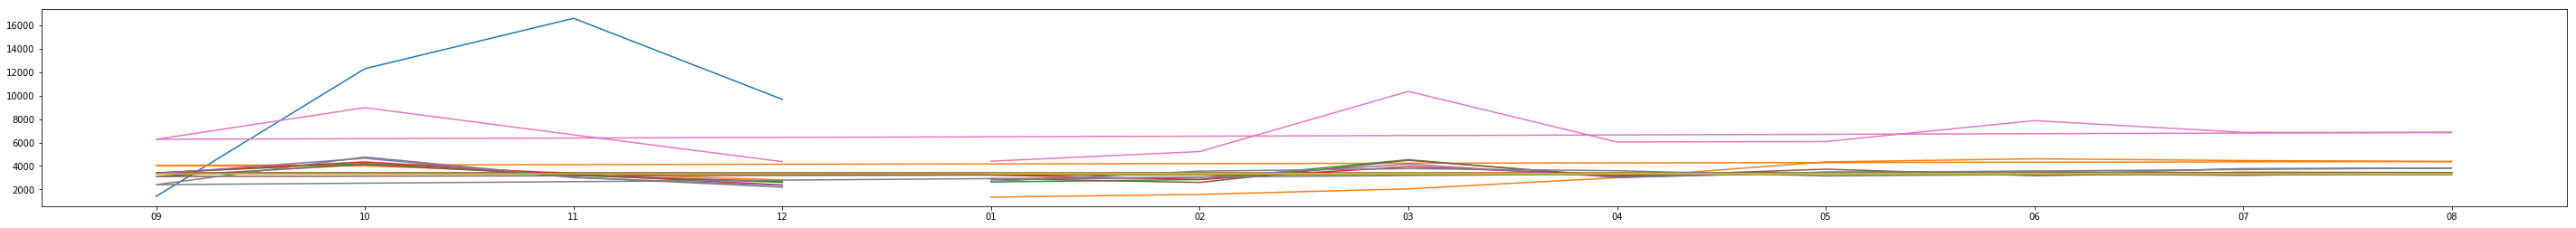

In [16]:
# change over the months

df_10=df[df['Year']=='2010']
change_over_months_10=df_10.groupby('Month')['Date'].count()

df_11=df[df['Year']=='2011']
change_over_months_11=df_11.groupby('Month')['Date'].count()

df_12=df[df['Year']=='2012']
change_over_months_12=df_12.groupby('Month')['Date'].count()

df_13=df[df['Year']=='2013']
change_over_months_13=df_13.groupby('Month')['Date'].count()

df_14=df[df['Year']=='2014']
change_over_months_14=df_14.groupby('Month')['Date'].count()

df_15=df[df['Year']=='2015']
change_over_months_15=df_15.groupby('Month')['Date'].count()

df_16=df[df['Year']=='2016']
change_over_months_16=df_16.groupby('Month')['Date'].count()

df_17=df[df['Year']=='2017']
change_over_months_17=df_17.groupby('Month')['Date'].count()

df_18=df[df['Year']=='2018']
change_over_months_18=df_18.groupby('Month')['Date'].count()

# print(pd.DataFrame(change_over_months_15))
plt.figure(figsize=(50,4))
plt.plot(change_over_months_10.index, change_over_months_10.values)
plt.plot(change_over_months_11.index, change_over_months_11.values)
plt.plot(change_over_months_12.index, change_over_months_12.values)
plt.plot(change_over_months_13.index, change_over_months_13.values)
plt.plot(change_over_months_14.index, change_over_months_14.values)
plt.plot(change_over_months_15.index, change_over_months_15.values)
plt.plot(change_over_months_16.index, change_over_months_16.values)
plt.plot(change_over_months_17.index, change_over_months_17.values)
plt.plot(change_over_months_18.index, change_over_months_18.values)



plt.show()

In [56]:
# time_hrs = pd.DataFrame(df['Time_Hr'].value_counts())
# time_hrs.head()
# # time_hrs.columns

,Time_Hr
17,8548
18,8301
08,6875
16,5604
19,5459


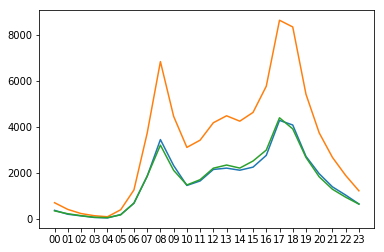

In [17]:
df_15=df[df['Year']=='2015']
change_over_time_15=df_15.groupby('Time_Hr')['Date'].count()

df_16=df[df['Year']=='2016']
change_over_time_16=df_16.groupby('Time_Hr')['Date'].count()

df_17=df[df['Year']=='2017']
change_over_time_17=df_17.groupby('Time_Hr')['Date'].count()

# print(pd.DataFrame(change_over_months_15))
plt.plot(change_over_time_15.index, change_over_time_15.values)
plt.plot(change_over_time_16.index, change_over_time_16.values)
plt.plot(change_over_time_17.index, change_over_time_17.values)

plt.show()

In [56]:
# filename = "bike_station_location.csv"
# location_df = pd.read_csv(filename, index_col=None, header=0)
# location_df.head(2)